# Pre-processing and Training Data Development

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [2]:
data = pd.read_csv('../data/interim/energy_weather_explore.csv',index_col=0)

In [3]:
data.head()

,datetime,energy,humidity,pressure,temperature,weather,wind_direction,wind_speed,year,month,month_name,day,hour,day_name,weekday
0,2012-12-31 01:00:00,10445.0,68.0,1020.0,269.72,overcast clouds,290.0,6.0,2012,12,December,31,1,Monday,0
1,2012-12-31 02:00:00,9897.0,73.0,1020.0,269.05,overcast clouds,290.0,6.0,2012,12,December,31,2,Monday,0
2,2012-12-31 03:00:00,9538.0,68.0,1021.0,268.53,overcast clouds,280.0,6.0,2012,12,December,31,3,Monday,0
3,2012-12-31 04:00:00,9333.0,79.0,1022.0,267.83,overcast clouds,280.0,8.0,2012,12,December,31,4,Monday,0
4,2012-12-31 05:00:00,9275.0,85.0,1023.0,266.77,overcast clouds,270.0,6.0,2012,12,December,31,5,Monday,0


Use datatime, get rid of other time-related columns

In [4]:
data = data[['datetime','energy','humidity','pressure','temperature','weather','wind_direction','wind_speed']]

In [5]:
data['datetime'] = pd.to_datetime(data['datetime'])

In [6]:
data = data.set_index('datetime')

In [7]:
data.dtypes

energy            float64
humidity          float64
pressure          float64
temperature       float64
weather            object
wind_direction    float64
wind_speed        float64
dtype: object

## Convert some features to one-hot encoding

First, the categorical data must be converted to one hot encoding. Here, the first item is not dropped to retain explanability.

For weather, there are several types that occur less frequently. Thus, any weather type less than 100 occurances out of 44081 days will be considered as "others".

In [8]:
data.weather.value_counts()

sky is clear                           10550
broken clouds                           7073
overcast clouds                         5095
scattered clouds                        4379
mist                                    4071
few clouds                              3760
light rain                              3688
moderate rain                           1452
light snow                               886
haze                                     871
fog                                      527
heavy intensity rain                     501
snow                                     241
light intensity drizzle                  227
heavy snow                               185
proximity thunderstorm                   178
drizzle                                  143
thunderstorm                              78
thunderstorm with light rain              60
very heavy rain                           29
thunderstorm with rain                    27
thunderstorm with heavy rain              20
proximity 

In [9]:
counts = data.weather.value_counts()
mask = data['weather'].isin(counts[counts < 100].index)
data['weather'][mask] = 'other'

/Users/gritkupgan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
one_hot_weather = pd.get_dummies(data.weather,prefix='weather')
data = data.join(one_hot_weather)

In [11]:
data.head()

,energy,humidity,pressure,temperature,weather,wind_direction,wind_speed,weather_broken clouds,weather_drizzle,weather_few clouds,...,weather_light rain,weather_light snow,weather_mist,weather_moderate rain,weather_other,weather_overcast clouds,weather_proximity thunderstorm,weather_scattered clouds,weather_sky is clear,weather_snow
datetime,,,,,,,,,,,,,,,,,,,,,
2012-12-31 01:00:00,10445.0,68.0,1020.0,269.72,overcast clouds,290.0,6.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2012-12-31 02:00:00,9897.0,73.0,1020.0,269.05,overcast clouds,290.0,6.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2012-12-31 03:00:00,9538.0,68.0,1021.0,268.53,overcast clouds,280.0,6.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2012-12-31 04:00:00,9333.0,79.0,1022.0,267.83,overcast clouds,280.0,8.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2012-12-31 05:00:00,9275.0,85.0,1023.0,266.77,overcast clouds,270.0,6.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Split data

Use year 2012 to 2016 as training data, and use year 2017 as test set

In [12]:
data_train = data.loc[:'2016']
data_test = data.loc['2017']

# Standardization

Note that the energy column is the label, no scaling needed

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

## Energy data

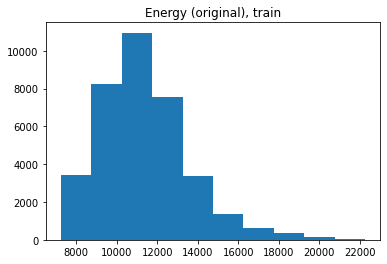

In [14]:
plt.hist(data_train['energy'])
plt.title('Energy (original), train')
plt.show()

The data is roughly gaussian, slightly skewed to the left. The standard scaler can be used.

In [15]:
scaler = StandardScaler()
scaler.fit(data_train[['energy']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
data_trasformed_train = scaler.transform(data_train[['energy']])
data_train['n_energy'] = data_trasformed_train

In [17]:
data_trasformed_test = scaler.transform(data_test[['energy']])
data_test['n_energy'] = data_trasformed_test

/Users/gritkupgan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


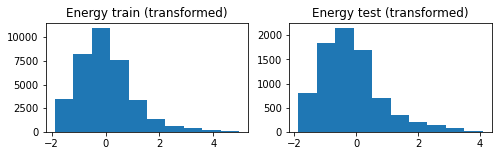

In [18]:
fig, ax = plt.subplots(1,2, figsize=(8,2))

ax[0].hist(data_trasformed_train)
ax[0].set_title('Energy train (transformed)')

ax[1].hist(data_trasformed_test)
ax[1].set_title('Energy test (transformed)')
plt.show()

In [19]:
scaler.mean_

array([11371.08805763])

In [20]:
scaler.scale_

array([2196.74458408])

## Humidity data

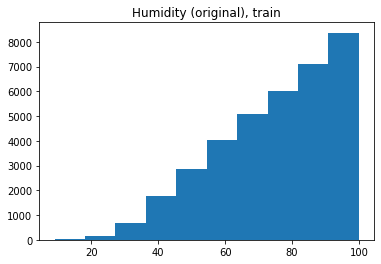

In [21]:
plt.hist(data_train['humidity'])
plt.title('Humidity (original), train')
plt.show()

The humidity measurement is typically between 0 to 100%. Thus, there is no outlier here and maxmin scaler will be used.

In [22]:
scaler = MinMaxScaler()
scaler.fit(data_train[['humidity']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [23]:
data_trasformed_train = scaler.transform(data_train[['humidity']])
data_train['n_humidity'] = data_trasformed_train

In [24]:
data_trasformed_test = scaler.transform(data_test[['humidity']])
data_test['n_humidity'] = data_trasformed_test

/Users/gritkupgan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


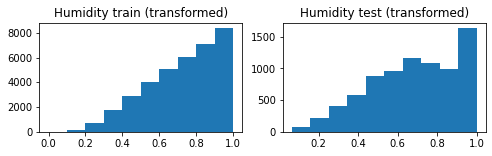

In [25]:
fig, ax = plt.subplots(1,2, figsize=(8,2))

ax[0].hist(data_trasformed_train)
ax[0].set_title('Humidity train (transformed)')

ax[1].hist(data_trasformed_test)
ax[1].set_title('Humidity test (transformed)')
plt.show()

## Pressure data

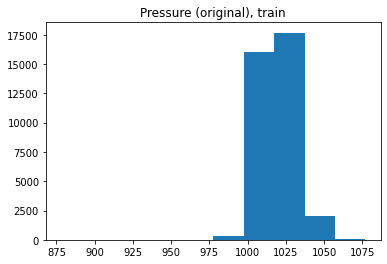

In [26]:
plt.hist(data_train['pressure'])
plt.title('Pressure (original), train')
plt.show()

The pressure data is roughly normal, standard scaler will be applied. Also, the pressure data appear to contain outliers. The outliers will be removed using 3 standard deviations as the limits.

In [27]:
mean = data_train.pressure.mean()
std = data_train.pressure.std()
cutoff = std*3
upper, lower = mean + cutoff, mean - cutoff
data_train = data_train[(data_train['pressure'] < upper) & (data_train['pressure'] > lower)]

In [28]:
data_test = data_test[(data_test['pressure'] < upper) & (data_test['pressure'] > lower)]

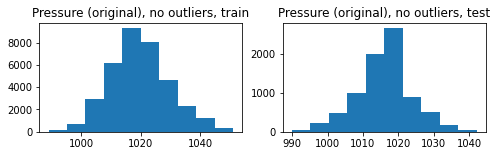

In [29]:
fig, ax = plt.subplots(1,2, figsize=(8,2))

ax[0].hist(data_train['pressure'])
ax[0].set_title('Pressure (original), no outliers, train')

ax[1].hist(data_test['pressure'])
ax[1].set_title('Pressure (original), no outliers, test')
plt.show()

In [30]:
scaler = StandardScaler()
scaler.fit(data_train[['pressure']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
data_trasformed_train = scaler.transform(data_train[['pressure']])
data_train['n_pressure'] = data_trasformed_train

In [32]:
data_trasformed_test = scaler.transform(data_test[['pressure']])
data_test['n_pressure'] = data_trasformed_test

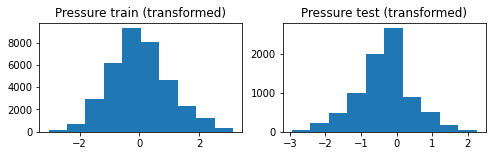

In [33]:
fig, ax = plt.subplots(1,2, figsize=(8,2))

ax[0].hist(data_trasformed_train)
ax[0].set_title('Pressure train (transformed)')

ax[1].hist(data_trasformed_test)
ax[1].set_title('Pressure test (transformed)')
plt.show()

## Temperature data

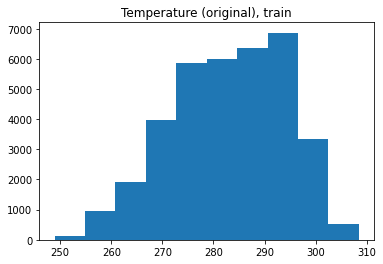

In [34]:
plt.hist(data_train['temperature'])
plt.title('Temperature (original), train')
plt.show()

The distribution of temperature is roughly normal, standard scaler will be used.

In [35]:
scaler = StandardScaler()
scaler.fit(data_train[['temperature']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [36]:
data_trasformed_train = scaler.transform(data_train[['temperature']])
data_train['n_temperature'] = data_trasformed_train

In [37]:
data_trasformed_test = scaler.transform(data_test[['temperature']])
data_test['n_temperature'] = data_trasformed_test

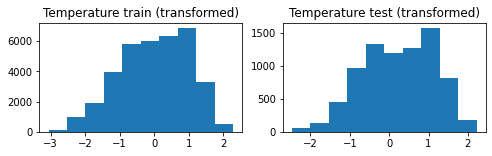

In [38]:
fig, ax = plt.subplots(1,2, figsize=(8,2))

ax[0].hist(data_trasformed_train)
ax[0].set_title('Temperature train (transformed)')

ax[1].hist(data_trasformed_test)
ax[1].set_title('Temperature test (transformed)')
plt.show()

## Wind direction data

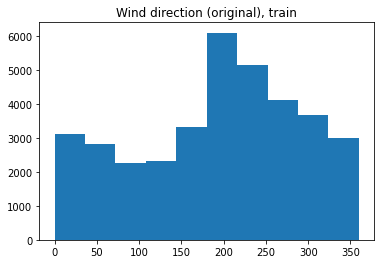

In [39]:
plt.hist(data_train['wind_direction'])
plt.title('Wind direction (original), train')
plt.show()

The distribution is not normal, minmax scaling will be used.

In [40]:
scaler = MinMaxScaler()
scaler.fit(data_train[['wind_direction']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [41]:
data_trasformed_train = scaler.transform(data_train[['wind_direction']])
data_train['n_wind_direction'] = data_trasformed_train

In [42]:
data_trasformed_test = scaler.transform(data_test[['wind_direction']])
data_test['n_wind_direction'] = data_trasformed_test

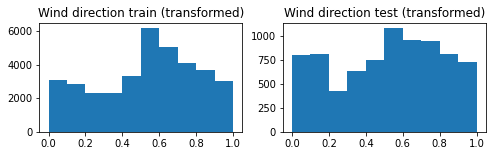

In [43]:
fig, ax = plt.subplots(1,2, figsize=(8,2))

ax[0].hist(data_trasformed_train)
ax[0].set_title('Wind direction train (transformed)')

ax[1].hist(data_trasformed_test)
ax[1].set_title('Wind direction test (transformed)')
plt.show()

## Wind speed data

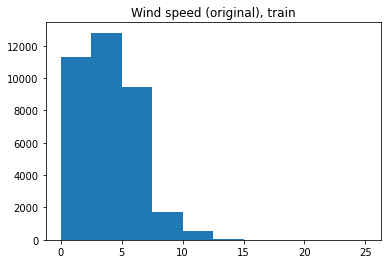

In [44]:
plt.hist(data_train['wind_speed'])
plt.title('Wind speed (original), train')
plt.show()

The wind speed is highly skewed to the left. Here the power transform featurewise is appropriate.

In [45]:
scaler = PowerTransformer()
scaler.fit(data_train[['wind_speed']])

PowerTransformer(copy=True, method='yeo-johnson', standardize=True)

In [46]:
data_trasformed_train = scaler.transform(data_train[['wind_speed']])
data_train['n_wind_speed'] = data_trasformed_train

In [47]:
data_trasformed_test = scaler.transform(data_test[['wind_speed']])
data_test['n_wind_speed'] = data_trasformed_test

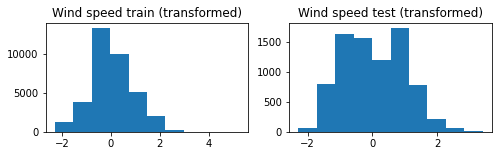

In [48]:
fig, ax = plt.subplots(1,2, figsize=(8,2))

ax[0].hist(data_trasformed_train)
ax[0].set_title('Wind speed train (transformed)')

ax[1].hist(data_trasformed_test)
ax[1].set_title('Wind speed test (transformed)')
plt.show()

In [49]:
data_train.head()

,energy,humidity,pressure,temperature,weather,wind_direction,wind_speed,weather_broken clouds,weather_drizzle,weather_few clouds,...,weather_proximity thunderstorm,weather_scattered clouds,weather_sky is clear,weather_snow,n_energy,n_humidity,n_pressure,n_temperature,n_wind_direction,n_wind_speed
datetime,,,,,,,,,,,,,,,,,,,,,
2012-12-31 01:00:00,10445.0,68.0,1020.0,269.72,overcast clouds,290.0,6.0,0,0,0,...,0,0,0,0,-0.421573,0.648352,0.051448,-1.192115,0.805556,1.008900
2012-12-31 02:00:00,9897.0,73.0,1020.0,269.05,overcast clouds,290.0,6.0,0,0,0,...,0,0,0,0,-0.671033,0.703297,0.051448,-1.252274,0.805556,1.008900
2012-12-31 03:00:00,9538.0,68.0,1021.0,268.53,overcast clouds,280.0,6.0,0,0,0,...,0,0,0,0,-0.834457,0.648352,0.151079,-1.298964,0.777778,1.008900
2012-12-31 04:00:00,9333.0,79.0,1022.0,267.83,overcast clouds,280.0,8.0,0,0,0,...,0,0,0,0,-0.927777,0.769231,0.250710,-1.361817,0.777778,1.655296
2012-12-31 05:00:00,9275.0,85.0,1023.0,266.77,overcast clouds,270.0,6.0,0,0,0,...,0,0,0,0,-0.954179,0.835165,0.350341,-1.456994,0.750000,1.008900


In [50]:
data_test.head()

,energy,humidity,pressure,temperature,weather,wind_direction,wind_speed,weather_broken clouds,weather_drizzle,weather_few clouds,...,weather_proximity thunderstorm,weather_scattered clouds,weather_sky is clear,weather_snow,n_energy,n_humidity,n_pressure,n_temperature,n_wind_direction,n_wind_speed
datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,10500.0,100.0,1011.0,274.06,overcast clouds,300.0,4.0,0,0,0,...,0,0,0,0,-0.396536,1.000000,-0.845232,-0.802427,0.833333,0.240049
2017-11-29 01:00:00,9541.0,54.0,1019.0,285.95,light rain,270.0,3.0,0,0,0,...,0,0,0,0,-0.833091,0.494505,-0.048183,0.265174,0.750000,-0.215174
2017-11-29 02:00:00,9112.0,71.0,1020.0,284.51,broken clouds,280.0,2.0,1,0,0,...,0,0,0,0,-1.028380,0.681319,0.051448,0.135876,0.777778,-0.744669
2017-11-29 03:00:00,8905.0,76.0,1021.0,282.96,sky is clear,290.0,2.0,0,0,0,...,0,0,1,0,-1.122610,0.736264,0.151079,-0.003298,0.805556,-0.744669
2017-11-29 04:00:00,8805.0,92.0,1022.0,282.04,scattered clouds,280.0,6.0,0,0,0,...,0,1,0,0,-1.168132,0.912088,0.250710,-0.085904,0.777778,1.008900


In [51]:
data_train.describe()

,energy,humidity,pressure,temperature,wind_direction,wind_speed,weather_broken clouds,weather_drizzle,weather_few clouds,weather_fog,...,weather_proximity thunderstorm,weather_scattered clouds,weather_sky is clear,weather_snow,n_energy,n_humidity,n_pressure,n_temperature,n_wind_direction,n_wind_speed
count,35884.000000,35884.000000,35884.000000,35884.000000,35884.000000,35884.000000,35884.000000,35884.000000,35884.000000,35884.000000,...,35884.000000,35884.000000,35884.000000,35884.000000,35884.000000,35884.000000,3.588400e+04,3.588400e+04,35884.000000,3.588400e+04
mean,11367.036952,75.276112,1019.483614,282.996727,191.971882,3.775582,0.171274,0.002118,0.093719,0.008918,...,0.002787,0.098763,0.228876,0.006577,-0.001844,0.728309,4.717989e-15,-1.633727e-15,0.533255,-4.182488e-15
std,2198.102678,18.148170,10.037168,11.137279,96.811082,2.257889,0.376754,0.045973,0.291441,0.094012,...,0.052717,0.298347,0.420115,0.080831,1.000618,0.199430,1.000014e+00,1.000014e+00,0.268920,1.000014e+00
min,7237.000000,9.000000,989.000000,248.890000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.881916,0.000000,-3.037116e+00,-3.062436e+00,0.000000,-2.284797e+00
25%,9785.000000,62.000000,1013.000000,274.691609,120.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.722018,0.582418,-6.459695e-01,-7.457148e-01,0.333333,-7.446693e-01
50%,11125.000000,78.000000,1019.000000,283.650000,202.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.112024,0.758242,-4.818298e-02,5.865724e-02,0.561111,-2.151742e-01
75%,12522.000000,89.000000,1026.000000,292.010000,270.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.523917,0.879121,6.492346e-01,8.092999e-01,0.750000,6.436754e-01
max,22269.000000,100.000000,1051.000000,308.480000,360.000000,25.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,4.960937,1.000000,3.140012e+00,2.288138e+00,1.000000,5.237277e+00


In [52]:
data_test.describe()

,energy,humidity,pressure,temperature,wind_direction,wind_speed,weather_broken clouds,weather_drizzle,weather_few clouds,weather_fog,...,weather_proximity thunderstorm,weather_scattered clouds,weather_sky is clear,weather_snow,n_energy,n_humidity,n_pressure,n_temperature,n_wind_direction,n_wind_speed
count,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,...,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000
mean,11013.677888,70.747466,1015.784758,285.638145,186.956201,3.918784,0.114504,0.008384,0.047804,0.025904,...,0.009761,0.102115,0.278188,0.000626,-0.162700,0.678544,-0.368521,0.237172,0.519323,0.079751
std,2157.968353,20.238121,7.798509,10.029244,102.365113,2.225360,0.318442,0.091188,0.213364,0.158859,...,0.098320,0.302818,0.448135,0.025008,0.982348,0.222397,0.776974,0.900524,0.284348,0.939163
min,7263.000000,15.000000,990.000000,255.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.870080,0.065934,-2.937485,-2.467129,0.000000,-2.284797
25%,9453.000000,56.000000,1011.000000,277.712000,100.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.873150,0.516484,-0.845232,-0.474515,0.277778,-0.744669
50%,10798.000000,72.000000,1016.000000,286.210000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.260881,0.692308,-0.347076,0.288519,0.555556,-0.215174
75%,11976.500000,87.000000,1020.000000,294.040000,270.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.275595,0.857143,0.051448,0.991573,0.750000,0.643675
max,20351.000000,100.000000,1042.000000,307.710000,360.000000,15.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,4.087827,1.000000,2.243332,2.219000,1.000000,3.407141


In [53]:
data_train.to_csv('../data/interim/energy_weather_features_train.csv')
data_test.to_csv('../data/interim/energy_weather_features_test.csv')